# Titanic survivor : Kaggle Competition

## Importing the Libraries:
<p>We will first start with importing the libraries that will be used for analysis and visualization of the dataset.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

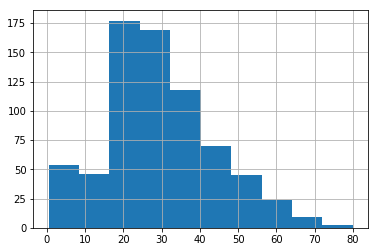

In [4]:
train.Age.hist()

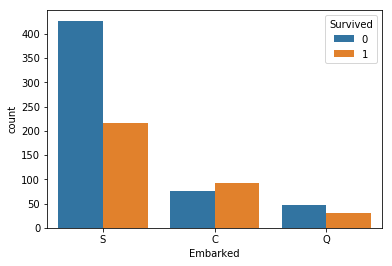

In [5]:
sns.countplot(train.Embarked, hue=train.Survived)

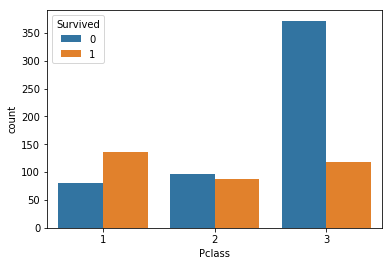

In [6]:
sns.countplot(train.Pclass, hue=train.Survived)

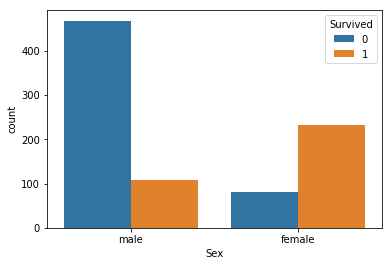

In [7]:
sns.countplot(train.Sex, hue= train.Survived)

In [8]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train.Embarked.fillna('S',inplace=True)

In [10]:
train.Cabin.fillna('U', inplace = True)
test.Cabin.fillna('U', inplace = True)

In [11]:
train.Cabin = train.Cabin.map(lambda name:name[0])
test.Cabin = test.Cabin.map(lambda name:name[0])

In [12]:
y = train.Survived
train.drop(['Survived', 'PassengerId'], axis = 1, inplace = True)

In [13]:
test_passengerid = test.PassengerId
test.drop('PassengerId', axis = 1, inplace= True)

In [14]:
train.Name = train.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())
test.Name = test.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [15]:
train.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [16]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [17]:
train.Name = train.Name.map(Title_Dictionary)
test.Name = test.Name.map(Title_Dictionary)

In [18]:
train.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [19]:
royal_mean = train[train.Name == 'Royalty'].Age.mean()
officer_mean = train[train.Name == 'Officer'].Age.mean()
mr_mean = train[train.Name == 'Mr'].Age.mean()
mrs_mean = train[train.Name == 'Mrs'].Age.mean()
miss_mean = train[train.Name == 'Miss'].Age.mean()
master_mean = train[train.Name == 'Master'].Age.mean()

In [20]:
train.loc[train.Name == "Royalty", "Age"] = train.loc[train.Name == "Royalty", "Age"].fillna(royal_mean)
test.loc[test.Name == "Royalty", "Age"]  = test.loc[test.Name == "Royalty", "Age"].fillna(royal_mean)
train.loc[train.Name == "Officer", "Age"] = train.loc[train.Name == "Officer", "Age"].fillna(officer_mean)
test.loc[test.Name == "Officer", "Age"] = test.loc[test.Name == "Officer", "Age"].fillna(officer_mean)
train.loc[train.Name == "Mr", "Age"] = train.loc[train.Name == "Mr", "Age"].fillna(mr_mean)
test.loc[test.Name == "Mr", "Age"] = test.loc[test.Name == "Mr", "Age"].fillna(mr_mean)
train.loc[train.Name == "Mrs", "Age"] = train.loc[train.Name == "Mrs", "Age"].fillna(mrs_mean)
test.loc[test.Name == "Mrs", "Age"] = test.loc[test.Name == "Mrs", "Age"].fillna(mrs_mean)
train.loc[train.Name == "Miss", "Age"]  = train.loc[train.Name == "Miss", "Age"].fillna(miss_mean)
test.loc[test.Name == "Miss", "Age"] = test.loc[test.Name == "Miss", "Age"].fillna(miss_mean)
train.loc[train.Name == "Master", "Age"] = train.loc[train.Name == "Master", "Age"].fillna(master_mean)
test.loc[test.Name == "Master", "Age"] = test.loc[test.Name == "Master", "Age"].fillna(master_mean)

In [21]:
train.drop('Ticket', axis = 'columns', inplace = True)
test.drop('Ticket', axis = 'columns', inplace = True)

In [22]:
train['FamilySize'] = train.SibSp + train.Parch + 1
test['FamilySize'] = test.SibSp + test.Parch + 1

In [23]:
train.FamilySize.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

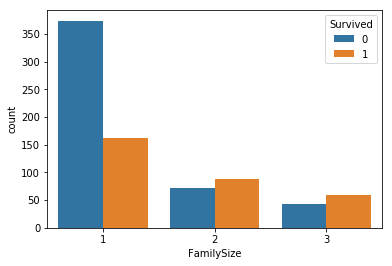

In [24]:
sns.countplot(train[train.FamilySize < 4].FamilySize, hue= y)

In [25]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize
0,3,Mr,male,22.0,1,0,7.2500,U,S,2
1,1,Mrs,female,38.0,1,0,71.2833,C,C,2
2,3,Miss,female,26.0,0,0,7.9250,U,S,1
3,1,Mrs,female,35.0,1,0,53.1000,C,S,2
4,3,Mr,male,35.0,0,0,8.0500,U,S,1


In [26]:
test.head()
test.shape

(418, 10)

In [27]:
test.Fare.fillna(train.mean(), inplace = True)

In [28]:
gender = {'male': 0, 'female': 1}
train.Sex = train.Sex.map(gender)
test.Sex = test.Sex.map(gender)

In [29]:
embarked = pd.get_dummies(train.Embarked, prefix = 'Embarked')
train.drop('Embarked', axis = 1, inplace = True)
train = pd.concat([train, embarked], axis = 1)

In [30]:
embarked = pd.get_dummies(test.Embarked, prefix = 'Embarked')
test.drop('Embarked', axis = 1, inplace = True)
test = pd.concat([test, embarked], axis = 1)

In [31]:
title = pd.get_dummies(train.Name, prefix = 'Title')
train.drop('Name', axis = 1, inplace = True)
train = pd.concat([train, title], axis = 1)

In [32]:
title = pd.get_dummies(test.Name, prefix = 'Title')
test.drop('Name', axis = 1, inplace = True)
test = pd.concat([test, title], axis = 1)

In [33]:
cabin = pd.get_dummies(train.Cabin, prefix = 'Cabin')
train.drop('Cabin', axis = 1, inplace = True)
train = pd.concat([train, cabin], axis = 1)

In [34]:
cabin = pd.get_dummies(test.Cabin, prefix = 'Cabin')
test.drop('Cabin', axis = 1, inplace = True)
test = pd.concat([test, cabin], axis = 1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.25)

In [36]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
clf.score(X_test, y_test)

0.7937219730941704

In [38]:
test.Fare.fillna(train.Fare.mean(),inplace = True)

In [39]:
test.insert(23, 'Cabin_T', 0)

In [40]:
y_pred = clf.predict(test)

In [41]:
results = pd.read_csv('gender_submission.csv')

In [42]:
results.Survived = y_pred

In [43]:
results.to_csv('Submission.csv', header = True, index = False)